# Unit 3: EDA (Exploratory Data Analysis)

---

## Lesson 3.3: How to Handle Outliers

### What is an Outlier?

An **outlier** is a value in a dataset that is **much higher or lower** than most of the other values.

Example:

Most people have ages between 0 and 100.  
If you see a value like 500 or -10 — that’s probably an outlier!


### Why Are Outliers Important?

- They can **mess up your graphs**
- They can **confuse your model**
- They can make **averages wrong**

So it’s important to **detect and deal with them**.

---


### Finding the Outliers

In [1]:
# First we will load all the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Loading the Dataset
df = pd.read_csv("Data/titanic_leapcode_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can find the outliers two ways:

#### 1. Visualizing the Outliers with Boxplot()

Text(0.5, 1.0, 'Age Values Boxplot')

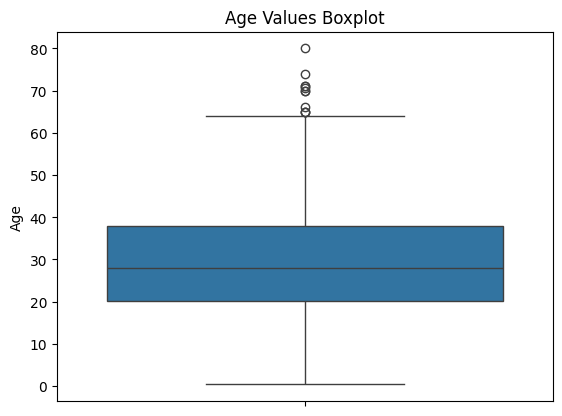

In [5]:
sns.boxplot(y="Age", data=df)
plt.title("Age Values Boxplot")

The median value is the line in the middle of the box

The box is where most values lie

The dots outside are outliers

#### 2. Find Outliers with the IQR rule

In [8]:
# Finding Q1 (25th percentile)
Q1 = df["Age"].quantile(0.25)
# Finding Q3 (75th percentile)
Q3 = df["Age"].quantile(0.75)
# IQR is founded using Q3-Q1
IQR = Q3 - Q1


# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


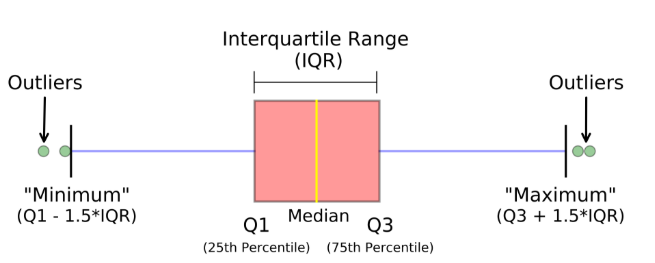

---

## Handling the Outliers

There are a few options to handle outliers

### 1. Remove the Outliers

In [15]:
# Creating a new dataframe that has no outliers using the conditions from the IQR rule
df_no_outliers = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]

df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Use this if:

- Outliers are errors

- You want to make the data cleaner

### 2. Replace the Outliers

In [23]:
# Finding median Age
median_age = df["Age"].median()

# Replacing outliers witht the median
df["age_fixed"] = df["Age"].apply(lambda x: median_age if x > upper_bound or x < lower_bound else x)

df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_fixed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0


Use this if:

- You want to keep all rows

- Outliers might be real, but too extreme

### 3. Leave Them Alone

Sometimes outliers are important, like:

- A student who scored 100% when others scored 50%

- A very rich person in an income dataset

Even in this case, it might not be a smart idea to remove or replace the outliers, because most of them are the elderly on the Titanic, not mistake or errors